In [91]:
!pip install pandas
!pip install numpy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
%pip install scipy
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
import os
filename = os.path.join(os.getcwd(), "personality_dataset.csv")

## Personality Dataset
Can we predict if a person will be an introvert or extrovert, given their attributes as a person? Could this help in professors creating group work in school or companies understanding their employees? Let's look at the data and explore it!

In [95]:
df = pd.read_csv(filename)

In [96]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [97]:
df.shape

(2900, 8)

In [98]:
df_numerical = df.select_dtypes(include='number')
df_numerical

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,4.0,6.0,13.0,5.0
1,9.0,0.0,0.0,0.0,3.0
2,9.0,1.0,2.0,5.0,2.0
3,0.0,6.0,7.0,14.0,8.0
4,3.0,9.0,4.0,8.0,5.0
...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0
2896,3.0,8.0,3.0,14.0,9.0
2897,4.0,1.0,1.0,4.0,0.0
2898,11.0,1.0,NaN,2.0,0.0


In [99]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

Our target label has a good balance for its class labels, meaning we won't have to worry too much about bias on one class label over the other as we continue analysis.

In [100]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

We can see that there are a good amount of null values in our datasets features.

In [101]:
df.shape

(2900, 8)

As we can see, there are 2900 examples we are using in this dataset. I have learnt that if our na values are 5% or less, are random, and other heuristic analyses by context, we can drop the na values as they won't share much insight to our model going forward. So I will be dropping these values.  

This is another option to impute the null values to the mean or median. From what I have learnt, if na values are between 5-20%, you will need to check with context on imputing or dropping na values. If the sum of na values is greater than 20%, then it is best to impute them given the mean or median, depending on its relationship with the target, is it normal or not.

`df['Stage_fear'] = pd.to_numeric(df['Stage_fear'], errors='coerce')`

`stageFillMean = df['Stage_fear'].fillna(df['Stage_fear'].mean())`

`stageFillMedian = df['Stage_fear'].fillna(df['Stage_fear'].median())`

In [102]:
nullCondition = df.isna().sum() != 0
col_names = df.isna().sum()[nullCondition].index
nullList = list(col_names)
nullList

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

While looking redundant because all features have null values in this dataset, understanding which features have null values and putting them in a list can help with data-driven decisions. Many models cannot take null values, especially linear models, so taking away null values can help us avoid runtime errors. It will also allow for others, if you are working in a team, to interpret data and use it later.

In [103]:
df.dropna(inplace=True)

df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

## One-hot encoding
Since we only have two more columns that aren't numerical, and we know that they only have two distinct classes in their feautre, this is a good use of one-hot encoding. This is when we turn the object datatype into numerical. It could be into binary 1s and 0s, and it could be rainting classes like 1-5. This instance, we will be using binary 1s and 0s.

In [104]:
df = pd.get_dummies(df, columns=['Stage_fear'], drop_first=False)

In [105]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes
0,4.0,4.0,6.0,No,13.0,5.0,Extrovert,True,False
1,9.0,0.0,0.0,Yes,0.0,3.0,Introvert,False,True
2,9.0,1.0,2.0,Yes,5.0,2.0,Introvert,False,True
3,0.0,6.0,7.0,No,14.0,8.0,Extrovert,True,False
4,3.0,9.0,4.0,No,8.0,5.0,Extrovert,True,False
...,...,...,...,...,...,...,...,...,...
2892,9.0,2.0,0.0,Yes,1.0,2.0,Introvert,False,True
2895,3.0,7.0,6.0,No,6.0,6.0,Extrovert,True,False
2896,3.0,8.0,3.0,No,14.0,9.0,Extrovert,True,False
2897,4.0,1.0,1.0,Yes,4.0,0.0,Introvert,False,True


In [106]:
df['Stage_fear_No'] = df['Stage_fear_No'].astype(int)
df['Stage_fear_Yes'] = df['Stage_fear_Yes'].astype(int)
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes
0,4.0,4.0,6.0,No,13.0,5.0,Extrovert,1,0
1,9.0,0.0,0.0,Yes,0.0,3.0,Introvert,0,1
2,9.0,1.0,2.0,Yes,5.0,2.0,Introvert,0,1
3,0.0,6.0,7.0,No,14.0,8.0,Extrovert,1,0
4,3.0,9.0,4.0,No,8.0,5.0,Extrovert,1,0
...,...,...,...,...,...,...,...,...,...
2892,9.0,2.0,0.0,Yes,1.0,2.0,Introvert,0,1
2895,3.0,7.0,6.0,No,6.0,6.0,Extrovert,1,0
2896,3.0,8.0,3.0,No,14.0,9.0,Extrovert,1,0
2897,4.0,1.0,1.0,Yes,4.0,0.0,Introvert,0,1


In [107]:
df = pd.get_dummies(df, columns=['Drained_after_socializing'], drop_first=False)
df


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,Extrovert,1,0,True,False
1,9.0,0.0,0.0,0.0,3.0,Introvert,0,1,False,True
2,9.0,1.0,2.0,5.0,2.0,Introvert,0,1,False,True
3,0.0,6.0,7.0,14.0,8.0,Extrovert,1,0,True,False
4,3.0,9.0,4.0,8.0,5.0,Extrovert,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...
2892,9.0,2.0,0.0,1.0,2.0,Introvert,0,1,False,True
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,1,0,True,False
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,1,0,True,False
2897,4.0,1.0,1.0,4.0,0.0,Introvert,0,1,False,True


In [108]:
df[['Drained_after_socializing_No', 'Drained_after_socializing_Yes']] = df[['Drained_after_socializing_No', 'Drained_after_socializing_Yes']].astype(int)
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,Extrovert,1,0,1,0
1,9.0,0.0,0.0,0.0,3.0,Introvert,0,1,0,1
2,9.0,1.0,2.0,5.0,2.0,Introvert,0,1,0,1
3,0.0,6.0,7.0,14.0,8.0,Extrovert,1,0,1,0
4,3.0,9.0,4.0,8.0,5.0,Extrovert,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2892,9.0,2.0,0.0,1.0,2.0,Introvert,0,1,0,1
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,1,0,1,0
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,1,0,1,0
2897,4.0,1.0,1.0,4.0,0.0,Introvert,0,1,0,1


If you used one-hot encoding to change categorical information into numerical, but merge it back to your DataFrame multiple times, it could allow for duplicates of columns to show up.
<br>`df = df.loc[:, ~df.columns.duplicated()]`

This code allows us to take off duplicated columns. With ':' we say using all rows, and for columns, it gets a little complicated. We use .duplicated() so we only pick duplicated columns, then use ~ as a negation, causing it to actually only pick original columns, not duplicated columns, and then assign that back to our DataFrame.

## Training Model on Dataset

Now that we have removed the null values, changed the features that were categorical to numerical, using one-hot encoding, we can use this dataset to train our model. Since we are trying to find if a person is extroverted or introverted, this will be a Supervised learning binary classification dataset. I will use Decision Trees with entropy to find predictions as this is a supervised learning method that works with binary classification. Later on, I will be finding the correlation that the features have with the label, to check how strong the linear relationships are in order to try Logistic Regression.

In [109]:
y = df['Personality']
X = df.drop('Personality', axis=1)

print(y.shape)
print(X.shape)

(2477,)
(2477, 9)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [111]:
#Using test size of 30% and a random seed of 1234
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1234)

print(X_train.shape)
print(y_train.shape)

(1733, 9)
(1733,)


## Grid Search
I will set up a grid search, which uses cross validation in the function to find the best hyperparameters for the model to tune to. I first give it a parameter grid of values to try, and it will pick the best values for each hyperparameter. Cross validation will also mimic splitting data into train and test sets, but in a more robust way, as it can split given the amount of folds it has, causing a reduction in overfitting and fighting against high variance. Using heuristics, I will select a 10 fold cross validation as that is the basis we learnt to do.

In [112]:
param_grid = {'criterion' : ['entropy'], 
              'max_depth': [3,5,8,13,21,34,55,89,144], 
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
              }

In [113]:
print('Running GridSearch...')

dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_model, param_grid, cv=10)
dt_grid_search = dt_grid.fit(X_train, y_train)

dt_grid_predict = dt_grid_search.predict(X_test)
dt_grid_proba = dt_grid_search.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, dt_grid_predict)

print('Done')
print('Accuracy:', acc)

Running GridSearch...
Done
Accuracy: 0.918010752688172


In [125]:
print(dt_grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}


## Confusion Matrix
We will create a confusion matrix to tell us about the false positives, negatives, and in general, how many examples we got right with our model.

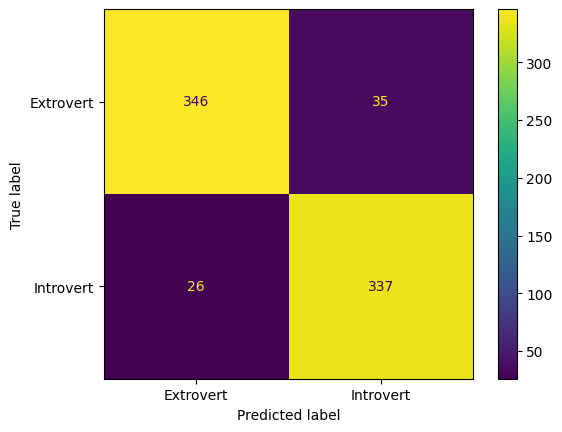

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, dt_grid_predict, labels=dt_grid_search.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_grid_search.classes_)
cm_display.plot()
plt.show()

In [115]:
pd.DataFrame(cm, columns=['Predicted: Extrovert', 'Predicted: Introvert'], index=['Actual: Extrovert', 'Actual: Introvert'])

,Predicted: Extrovert,Predicted: Introvert
Actual: Extrovert,346,35
Actual: Introvert,26,337


## ROC AUC
We should also check the area under the curve (AUC) value of the Receiver Operating Characteristic (ROC) curve since this is a binary classification. This a performance metric that evaluates the ability for this model to understand the difference between both classes. We will plot the true positive rate against the false positive rate and find the area under the curve. <br>
In order to get the AUC score, and to use linear models, we will need to change our label to a numerical value instead of its object value. Many of these calculations expect the label to be numerical and won't work with it other wise, so let's change the label and encode it.

In [116]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

le = LabelEncoder()
le.fit(y)

y_encoded = le.transform(y)
y_test_encoded = le.transform(y_test)

fpr,tpr,thresholds = roc_curve(y_test_encoded, dt_grid_proba)

le.classes_

array(['Extrovert', 'Introvert'], dtype=object)

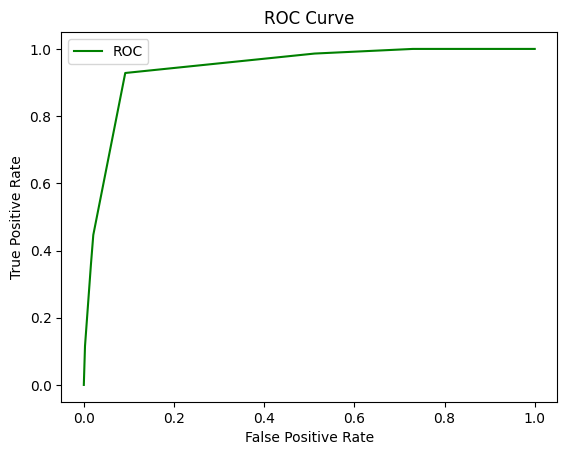

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr, y=tpr, color='green', label='ROC')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Because decision trees don't have a threshold hyperparameter, there won't be a curvature for the ROC curve, like how you would see for logistic regression, meaning you will see rigid lines plotted above. So why did I still use this curve for it? Even without thresholds, we can get a decent shape to see how the ROC curve looks like for our model, and it allows us to see our auc value.<br> 

The Area under the Curve (AUC) value shows us how good our model is at distinguishing between our class labels. A score of 1 means the model predicted the right outcome 100% of the time, .5 means the model is just as good as randomly guessing and seeing if you are right, while an auc value of less than .5 means the model predicts worse than randomly guessing and checking. Let's see the auc score of our model given the ROC Curve.

In [121]:
auc_score = roc_auc_score(y_test_encoded, dt_grid_proba)
print("Area under the curve value: {:.2f}".format(auc_score))

Area under the curve value: 0.94


## Understanding our Decision Tree
Our AUC Score is 0.94, meaning that our model accurately predicts the right outcome 94% of the time. Let's recap our decision tree model and understand why it works well using the auc value. We used a grid search to check what our best hyperparameters are to train this model on the personality dataset, which lead us to go with an extremely shallow decision tree. This told us that a shallow tree with more cuts at each level is helping us go against overfitting, wider rather than deeper. We got a good accuracy score of 91%, but this could be overfitting or class imbalance, leading us to find the auc value. I created a confusion matrix to check the false and true positives and negatives to pretty good results. The auc score off the roc graph came out to be 0.94, meaning the model is very good at understanding both classes and our accuracy shows that we can predict on each class pretty well. A shallow decision tree works well with this dataset, but let's try a logistic regression as this is a binary classification problem.